In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.svm import SVR
from sklearn import metrics
from scipy import stats
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelBinarizer
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import scipy
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

In [2]:
df = pd.read_csv('Loan_data_preprocessed.csv', sep=',')

In [3]:
df.shape

(38642, 29)

## zadanie 3

In [4]:
df.iloc[0:5, 0:20]

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  1077501     5000.0       5000.0           4975.0   36 months    0.1065   
1  1077430     2500.0       2500.0           2500.0   60 months    0.1527   
2  1077175     2400.0       2400.0           2400.0   36 months    0.1596   
3  1076863    10000.0      10000.0          10000.0   36 months    0.1349   
4  1075358     3000.0       3000.0           3000.0   60 months    0.1269   

   installment emp_length home_ownership  annual_inc verification_status  \
0       162.87  10+ years           RENT     24000.0            Verified   
1        59.83   < 1 year           RENT     30000.0     Source Verified   
2        84.33  10+ years           RENT     12252.0        Not Verified   
3       339.31  10+ years           RENT     49200.0     Source Verified   
4        67.79     1 year           RENT     80000.0     Source Verified   

      issue_d  loan_status         purpose    dti  fico_range_low  \
0  2011-12-01            1     credit_card  27.65           735.0   
1  2011-12-01            0             car   1.00           740.0   
2  2011-12-01            1  small_business   8.72           735.0   
3  2011-12-01            1           other  20.00           690.0   
4  2011-12-01            1           other  17.94           695.0   

   fico_range_high  open_acc  pub_rec  revol_bal  
0            739.0       3.0      0.0    13648.0  
1            744.0       3.0      0.0     1687.0  
2            739.0       2.0      0.0     2956.0  
3            694.0      10.0      0.0     5598.0  
4            699.0      15.0      0.0    27783.0

In [5]:
df['last_fico_range_average'] = (df['last_fico_range_high'] + df['last_fico_range_low'])/2
df['monthly_inc']= df['annual_inc']/12
df['precent_salary_loan']= ((df['installment']*100)/df['monthly_inc'])
df['fico_range_average'] = (df['fico_range_high'] + df['fico_range_low'])/2

In [6]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])
df['last_pymnt_year'] = df['last_pymnt_d'].dt.year
df['last_pymnt_month'] = df['last_pymnt_d'].dt.month
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month


In [7]:
value = []

for row in df['annual_inc']:
    if row < 15000.0:
        value.append(0)
    elif row >= 15000.0:
        value.append(1)
        
df['annual_inc > 15000']=value

In [8]:
value = []

for row in df['issue_month']:
    if row == 12 or row==1 or row==2:
        value.append(1)
    elif row == 11 or row== 10 or row==9:
        value.append(2)
    elif row == 8 or row== 7 or row==6:
        value.append(3)
    elif row == 3 or row== 4 or row== 5:
        value.append(4)
    else:
        value.append(5)
df['Season']=value

In [9]:
value = []

for row in df['fico_range_high']:
    if row <= 580:
        value.append(0)
    elif 580 > row <= 669:
        value.append(1)
    elif 670 >= row <= 739:
        value.append(2) 
    elif 740 >= row <= 799:
        value.append(3)
    else:
        value.append(4)
        
df['fico_range_high_level']=value

In [10]:
df['total_pymnt/loan_amnt'] = (df['total_pymnt'] / df['loan_amnt'])

In [11]:
value = []

for row in df['purpose']:
    if row == 'debt consolidation':
        value.append(1)
    else:
        value.append(0)
        
df['consolidation loan']=value

In [12]:
df.iloc[0:5,20:40]

total_acc initial_list_status   total_pymnt  total_pymnt_inv  \
0        9.0                   f   5863.155187          5833.84   
1        4.0                   f   1014.530000          1014.53   
2       10.0                   f   3005.666844          3005.67   
3       37.0                   f  12231.890000         12231.89   
4       38.0                   f   4066.908161          4066.91   

   total_rec_prncp last_pymnt_d  last_fico_range_high  last_fico_range_low  \
0          5000.00   2015-01-01                 739.0                735.0   
1           456.46   2013-04-01                 499.0                  0.0   
2          2400.00   2014-06-01                 739.0                735.0   
3         10000.00   2015-01-01                 604.0                600.0   
4          3000.00   2017-01-01                 684.0                680.0   

   fico_range_high_level  last_fico_range_average  monthly_inc  \
0                      3                    737.0  2000.000000   
1                      4                    249.5  2500.000000   
2                      3                    737.0  1021.000000   
3                      3                    602.0  4100.000000   
4                      3                    682.0  6666.666667   

   precent_salary_loan  fico_range_average  last_pymnt_year  last_pymnt_month  \
0             8.143500               737.0             2015                 1   
1             2.393200               742.0             2013                 4   
2             8.259549               737.0             2014                 6   
3             8.275854               692.0             2015                 1   
4             1.016850               697.0             2017                 1   

   issue_year  issue_month  annual_inc > 15000  Season  total_pymnt/loan_amnt  
0        2011           12                   1       1               1.172631  
1        2011           12                   1       1               0.405812  
2        2011           12                   0       1               1.252361  
3        2011           12                   1       1               1.223189  
4        2011           12                   1       1               1.355636

In [13]:
label_bin= LabelBinarizer()
l = label_bin.fit_transform(df['emp_length'])
df_label_bin= pd.DataFrame(l, columns=label_bin.classes_);df_label_bin

1 year  10+ years  2 years  3 years  4 years  5 years  6 years  \
0           0          1        0        0        0        0        0   
1           0          0        0        0        0        0        0   
2           0          1        0        0        0        0        0   
3           0          1        0        0        0        0        0   
4           1          0        0        0        0        0        0   
...       ...        ...      ...      ...      ...      ...      ...   
38637       0          0        0        0        1        0        0   
38638       0          0        0        1        0        0        0   
38639       0          0        0        0        0        0        0   
38640       0          0        0        0        0        0        0   
38641       0          0        0        0        0        0        0   

       7 years  8 years  9 years  < 1 year  
0            0        0        0         0  
1            0        0        0         1  
2            0        0        0         0  
3            0        0        0         0  
4            0        0        0         0  
...        ...      ...      ...       ...  
38637        0        0        0         0  
38638        0        0        0         0  
38639        0        0        0         1  
38640        0        0        0         1  
38641        0        0        0         1  

[38642 rows x 11 columns]

In [14]:
encoded_columns = pd.get_dummies(df['emp_length'])
df = df.join(encoded_columns).drop('emp_length', axis=1)

In [15]:
label_bin= LabelBinarizer()
l = label_bin.fit_transform(df['verification_status'])
df_label_bin= pd.DataFrame(l, columns=label_bin.classes_);df_label_bin

Not Verified  Source Verified  Verified
0                 0                0         1
1                 0                1         0
2                 1                0         0
3                 0                1         0
4                 0                1         0
...             ...              ...       ...
38637             1                0         0
38638             1                0         0
38639             1                0         0
38640             1                0         0
38641             1                0         0

[38642 rows x 3 columns]

In [16]:
encoded_columns = pd.get_dummies(df['verification_status'])
df = df.join(encoded_columns).drop('verification_status', axis=1)

In [17]:
label_bin= LabelBinarizer()
l = label_bin.fit_transform(df['purpose'])
df_label_bin= pd.DataFrame(l, columns=label_bin.classes_);df_label_bin

car  credit_card  debt_consolidation  educational  home_improvement  \
0        0            1                   0            0                 0   
1        1            0                   0            0                 0   
2        0            0                   0            0                 0   
3        0            0                   0            0                 0   
4        0            0                   0            0                 0   
...    ...          ...                 ...          ...               ...   
38637    0            0                   0            0                 1   
38638    0            1                   0            0                 0   
38639    0            0                   1            0                 0   
38640    0            0                   0            0                 0   
38641    0            0                   1            0                 0   

       house  major_purchase  medical  moving  other  renewable_energy  \
0          0               0        0       0      0                 0   
1          0               0        0       0      0                 0   
2          0               0        0       0      0                 0   
3          0               0        0       0      1                 0   
4          0               0        0       0      1                 0   
...      ...             ...      ...     ...    ...               ...   
38637      0               0        0       0      0                 0   
38638      0               0        0       0      0                 0   
38639      0               0        0       0      0                 0   
38640      0               0        0       0      1                 0   
38641      0               0        0       0      0                 0   

       small_business  vacation  wedding  
0                   0         0        0  
1                   0         0        0  
2                   1         0        0  
3                   0         0        0  
4                   0         0        0  
...               ...       ...      ...  
38637               0         0        0  
38638               0         0        0  
38639               0         0        0  
38640               0         0        0  
38641               0         0        0  

[38642 rows x 14 columns]

In [18]:
encoded_columns = pd.get_dummies(df['purpose'])
df = df.join(encoded_columns).drop('purpose', axis=1)

In [19]:
label_bin= LabelBinarizer()
l = label_bin.fit_transform(df['home_ownership'])
df_label_bin= pd.DataFrame(l, columns=label_bin.classes_);df_label_bin

MORTGAGE  NONE  OTHER  OWN  RENT
0             0     0      0    0     1
1             0     0      0    0     1
2             0     0      0    0     1
3             0     0      0    0     1
4             0     0      0    0     1
...         ...   ...    ...  ...   ...
38637         1     0      0    0     0
38638         0     0      0    0     1
38639         1     0      0    0     0
38640         1     0      0    0     0
38641         0     0      0    1     0

[38642 rows x 5 columns]

In [20]:
pd.get_dummies(df, columns = ['home_ownership'])

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0      1077501     5000.0       5000.0           4975.0   36 months    0.1065   
1      1077430     2500.0       2500.0           2500.0   60 months    0.1527   
2      1077175     2400.0       2400.0           2400.0   36 months    0.1596   
3      1076863    10000.0      10000.0          10000.0   36 months    0.1349   
4      1075358     3000.0       3000.0           3000.0   60 months    0.1269   
...        ...        ...          ...              ...         ...       ...   
38637    92187     2500.0       2500.0           1075.0   36 months    0.0807   
38638    90665     8500.0       8500.0            875.0   36 months    0.1028   
38639    90395     5000.0       5000.0           1325.0   36 months    0.0807   
38640    90376     5000.0       5000.0            650.0   36 months    0.0743   
38641    87023     7500.0       7500.0            800.0   36 months    0.1375   

       installment  annual_inc    issue_d  loan_status  ...  other  \
0           162.87     24000.0 2011-12-01            1  ...      0   
1            59.83     30000.0 2011-12-01            0  ...      0   
2            84.33     12252.0 2011-12-01            1  ...      0   
3           339.31     49200.0 2011-12-01            1  ...      1   
4            67.79     80000.0 2011-12-01            1  ...      1   
...            ...         ...        ...          ...  ...    ...   
38637        78.42    110000.0 2007-07-01            1  ...      0   
38638       275.38     18000.0 2007-07-01            1  ...      0   
38639       156.84    100000.0 2007-07-01            1  ...      0   
38640       155.38    200000.0 2007-07-01            1  ...      1   
38641       255.43     22000.0 2007-06-01            1  ...      0   

       renewable_energy  small_business  vacation  wedding  \
0                     0               0         0        0   
1                     0               0         0        0   
2                     0               1         0        0   
3                     0               0         0        0   
4                     0               0         0        0   
...                 ...             ...       ...      ...   
38637                 0               0         0        0   
38638                 0               0         0        0   
38639                 0               0         0        0   
38640                 0               0         0        0   
38641                 0               0         0        0   

       home_ownership_MORTGAGE  home_ownership_NONE home_ownership_OTHER  \
0                            0                    0                    0   
1                            0                    0                    0   
2                            0                    0                    0   
3                            0                    0                    0   
4                            0                    0                    0   
...                        ...                  ...                  ...   
38637                        1                    0                    0   
38638                        0                    0                    0   
38639                        1                    0                    0   
38640                        1                    0                    0   
38641                        0                    0                    0   

       home_ownership_OWN  home_ownership_RENT  
0                       0                    1  
1                       0                    1  
2                       0                    1  
3                       0                    1  
4                       0                    1  
...                   ...                  ...  
38637                   0                    0  
38638                   0                    1  
38639                   0                    0  
38640                   0                    0  
3

In [21]:
label = LabelEncoder()
df['home_ownership'] = label.fit_transform(df['home_ownership']);df

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0      1077501     5000.0       5000.0           4975.0   36 months    0.1065   
1      1077430     2500.0       2500.0           2500.0   60 months    0.1527   
2      1077175     2400.0       2400.0           2400.0   36 months    0.1596   
3      1076863    10000.0      10000.0          10000.0   36 months    0.1349   
4      1075358     3000.0       3000.0           3000.0   60 months    0.1269   
...        ...        ...          ...              ...         ...       ...   
38637    92187     2500.0       2500.0           1075.0   36 months    0.0807   
38638    90665     8500.0       8500.0            875.0   36 months    0.1028   
38639    90395     5000.0       5000.0           1325.0   36 months    0.0807   
38640    90376     5000.0       5000.0            650.0   36 months    0.0743   
38641    87023     7500.0       7500.0            800.0   36 months    0.1375   

       installment  home_ownership  annual_inc    issue_d  ...  \
0           162.87               4     24000.0 2011-12-01  ...   
1            59.83               4     30000.0 2011-12-01  ...   
2            84.33               4     12252.0 2011-12-01  ...   
3           339.31               4     49200.0 2011-12-01  ...   
4            67.79               4     80000.0 2011-12-01  ...   
...            ...             ...         ...        ...  ...   
38637        78.42               0    110000.0 2007-07-01  ...   
38638       275.38               4     18000.0 2007-07-01  ...   
38639       156.84               0    100000.0 2007-07-01  ...   
38640       155.38               0    200000.0 2007-07-01  ...   
38641       255.43               3     22000.0 2007-06-01  ...   

       home_improvement  house  major_purchase  medical  moving  other  \
0                     0      0               0        0       0      0   
1                     0      0               0        0       0      0   
2                     0      0               0        0       0      0   
3                     0      0               0        0       0      1   
4                     0      0               0        0       0      1   
...                 ...    ...             ...      ...     ...    ...   
38637                 1      0               0        0       0      0   
38638                 0      0               0        0       0      0   
38639                 0      0               0        0       0      0   
38640                 0      0               0        0       0      1   
38641                 0      0               0        0       0      0   

       renewable_energy  small_business vacation  wedding  
0                     0               0        0        0  
1                     0               0        0        0  
2                     0               1        0        0  
3                     0               0        0        0  
4                     0               0        0        0  
...                 ...             ...      ...      ...  
38637                 0               0        0        0  
38638                 0               0        0        0  
38639                 0               0        0        0  
38640                 0               0        0        0  
38641                 0               0        0        0  

[38642 rows x 66 columns]

In [22]:
df.shape

(38642, 66)

In [23]:
df.iloc[0:20,20:40]

total_pymnt_inv  total_rec_prncp last_pymnt_d  last_fico_range_high  \
0           5833.84          5000.00   2015-01-01                 739.0   
1           1014.53           456.46   2013-04-01                 499.0   
2           3005.67          2400.00   2014-06-01                 739.0   
3          12231.89         10000.00   2015-01-01                 604.0   
4           4066.91          3000.00   2017-01-01                 684.0   
5           5632.21          5000.00   2015-01-01                 564.0   
6          10137.84          7000.00   2016-05-01                 654.0   
7           3939.14          3000.00   2015-01-01                 689.0   
8            647.50           162.02   2012-04-01                 499.0   
9           1477.70           673.48   2012-11-01                 504.0   
10          7678.02          6500.00   2013-06-01                 779.0   
11         13947.99         12000.00   2013-09-01                 669.0   
12          2277.32          1256.14   2012-07-01                 619.0   
13          3480.27          3000.00   2015-01-01                 799.0   
14          7471.99          5433.47   2013-10-01                 654.0   
15          1270.72          1000.00   2015-01-01                 694.0   
16         12527.15         10000.00   2015-01-01                 644.0   
17          3785.27          3600.00   2013-05-01                 794.0   
18          7167.07          6000.00   2015-02-01                 559.0   
19          9460.00          9200.00   2012-07-01                 644.0   

    last_fico_range_low  fico_range_high_level  last_fico_range_average  \
0                 735.0                      3                    737.0   
1                   0.0                      4                    249.5   
2                 735.0                      3                    737.0   
3                 600.0                      3                    602.0   
4                 680.0                      3                    682.0   
5                 560.0                      3                    562.0   
6                 650.0                      3                    652.0   
7                 685.0                      2                    687.0   
8                   0.0                      3                    249.5   
9                 500.0                      3                    502.0   
10                775.0                      3                    777.0   
11                665.0                      3                    667.0   
12                615.0                      3                    617.0   
13                795.0                      3                    797.0   
14                650.0                      3                    652.0   
15                690.0                      2                    692.0   
16                640.0                      3                    642.0   
17                790.0                      4                    792.0   
18                555.0                      3                    557.0   
19                640.0                      4                    642.0   

    monthly_inc  precent_salary_loan  fico_range_average  last_pymnt_year  \
0   2000.000000             8.143500               737.0             2015   
1   2500.000000             2.393200               742.0             2013   
2   1021.000000             8.259549               737.0             2014   
3   4100.000000             8.275854               692.0             2015   
4   6666.666667             1.016850               697.0             2017   
5   3000.000000             5.215333               732.0             2015   
6   3917.000000             4.342099               692.0             2016   
7   4000.000000             2.735750               662.0             2015   
8   3333.333333             4.571700               677.0             2012   
9   1250.000000             9.716000               727.0             2012   
10  6

In [24]:
df['term'] = df['term'].map(lambda x: float(x[:-6]))

In [25]:
df.drop(axis=1, columns=['issue_d'], inplace=True)

In [26]:
df.drop(axis=1, columns=['last_pymnt_d'], inplace=True)

In [27]:
df.drop(axis=1, columns=['initial_list_status'], inplace=True)

In [28]:
df.iloc[0:5, 0:20]

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501     5000.0       5000.0           4975.0  36.0    0.1065   
1  1077430     2500.0       2500.0           2500.0  60.0    0.1527   
2  1077175     2400.0       2400.0           2400.0  36.0    0.1596   
3  1076863    10000.0      10000.0          10000.0  36.0    0.1349   
4  1075358     3000.0       3000.0           3000.0  60.0    0.1269   

   installment  home_ownership  annual_inc  loan_status    dti  \
0       162.87               4     24000.0            1  27.65   
1        59.83               4     30000.0            0   1.00   
2        84.33               4     12252.0            1   8.72   
3       339.31               4     49200.0            1  20.00   
4        67.79               4     80000.0            1  17.94   

   fico_range_low  fico_range_high  open_acc  pub_rec  revol_bal  total_acc  \
0           735.0            739.0       3.0      0.0    13648.0        9.0   
1           740.0            744.0       3.0      0.0     1687.0        4.0   
2           735.0            739.0       2.0      0.0     2956.0       10.0   
3           690.0            694.0      10.0      0.0     5598.0       37.0   
4           695.0            699.0      15.0      0.0    27783.0       38.0   

    total_pymnt  total_pymnt_inv  total_rec_prncp  
0   5863.155187          5833.84          5000.00  
1   1014.530000          1014.53           456.46  
2   3005.666844          3005.67          2400.00  
3  12231.890000         12231.89         10000.00  
4   4066.908161          4066.91          3000.00

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38642 entries, 0 to 38641
Data columns (total 63 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38642 non-null  int64  
 1   loan_amnt                38642 non-null  float64
 2   funded_amnt              38642 non-null  float64
 3   funded_amnt_inv          38642 non-null  float64
 4   term                     38642 non-null  float64
 5   int_rate                 38642 non-null  float64
 6   installment              38642 non-null  float64
 7   home_ownership           38642 non-null  int32  
 8   annual_inc               38642 non-null  float64
 9   loan_status              38642 non-null  int64  
 10  dti                      38642 non-null  float64
 11  fico_range_low           38642 non-null  float64
 12  fico_range_high          38642 non-null  float64
 13  open_acc                 38642 non-null  float64
 14  pub_rec               

In [30]:
df['wedding'] = df['wedding'].astype('float64')
df['other'] = df['other'].astype('float64')
df['Not Verified'] = df['Not Verified'].astype('float64')

In [31]:
df['vacation'] = df['vacation'].astype('float64')
df['small_business'] = df['small_business'].astype('float64')
df['renewable_energy'] = df['renewable_energy'].astype('float64')
df['moving'] = df['moving'].astype('float64')
df['medical'] = df['medical'].astype('float64')
df['major_purchase'] = df['major_purchase'].astype('float64')
df['house'] = df['house'].astype('float64')
df['home_improvement'] = df['home_improvement'].astype('float64')
df['educational'] = df['educational'].astype('float64')
df['debt_consolidation'] = df['debt_consolidation'].astype('float64')
df['credit_card'] = df['credit_card'].astype('float64')
df['car'] = df['car'].astype('float64')
df['Verified'] = df['Verified'].astype('float64')
df['Source Verified'] = df['Source Verified'].astype('float64')
df['< 1 year'] = df['< 1 year'].astype('float64')
df['9 years'] = df['9 years'].astype('float64')
df['8 years'] = df['8 years'].astype('float64')
df['7 years'] = df['7 years'].astype('float64')
df['6 years'] = df['6 years'].astype('float64')
df['5 years'] = df['5 years'].astype('float64')
df['4 years'] = df['4 years'].astype('float64')
df['3 years'] = df['3 years'].astype('float64')
df['2 years'] = df['2 years'].astype('float64')
df['10+ years'] = df['10+ years'].astype('float64')
df['1 year'] = df['1 year'].astype('float64')
df['consolidation loan'] = df['consolidation loan'].astype('float64')
df['Season'] = df['Season'].astype('float64')
df['annual_inc > 15000'] = df['annual_inc > 15000'].astype('float64')
df['issue_month'] = df['issue_month'].astype('float64')
df['issue_year'] = df['issue_year'].astype('float64')
df['last_pymnt_month'] = df['last_pymnt_month'].astype('float64')
df['last_pymnt_year'] = df['last_pymnt_year'].astype('float64')
df['fico_range_high_level'] = df['fico_range_high_level'].astype('float64')
df['loan_status'] = df['loan_status'].astype('float64')
df['home_ownership'] = df['home_ownership'].astype('float64')  

In [32]:
df['pub_rec'] = df['pub_rec'].astype('float64')

In [33]:
df['id'] = df['id'].astype('float64')

### Zadanie 4 podpunkt 1

In [34]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn import neighbors
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## Dzielenie danych na testowe i treningowe

In [35]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [36]:
X.shape

(38642, 62)

In [37]:
splits = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
X_train, X_test, y_train, y_test = splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(30913, 62) (7729, 62) (30913,) (7729,)


In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Metoda łokcia

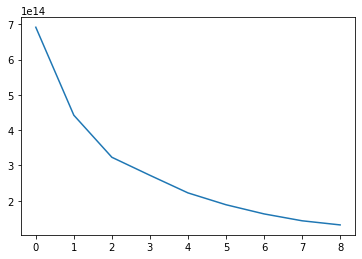

In [43]:
ssd = [] 
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X)
    
    ssd.append(kmeans.inertia_)
    

plt.plot(ssd)

In [135]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    
   
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X)
    
    cluster_labels = kmeans.labels_
    
 
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.2997244282399411
For n_clusters=3, the silhouette score is 0.26263352411132496
For n_clusters=4, the silhouette score is 0.27767803774144384
For n_clusters=5, the silhouette score is 0.2497088736961992
For n_clusters=6, the silhouette score is 0.2361974958669043
For n_clusters=7, the silhouette score is 0.21258963300882758
For n_clusters=8, the silhouette score is 0.21808494117280341
For n_clusters=9, the silhouette score is 0.2039017420230134
For n_clusters=10, the silhouette score is 0.19958541053746182


## Kmeans

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)
X_pca_final = pca_final.fit_transform(X_scaled)

In [47]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_pca_final)
y_kmeans = kmeans.predict(X_pca_final)

In [48]:
X_scaled_df = pd.DataFrame(X_scaled)

In [49]:
df1=df

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=42)
kmeans.fit(X)

KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [52]:
df1['K-Means_Cluster_ID'] = kmeans.labels_

In [53]:
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [54]:
df1['K-Means_Cluster_ID'] = kmeans.labels_

In [55]:
df1.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501.0     5000.0       5000.0           4975.0  36.0    0.1065   
1  1077430.0     2500.0       2500.0           2500.0  60.0    0.1527   
2  1077175.0     2400.0       2400.0           2400.0  36.0    0.1596   
3  1076863.0    10000.0      10000.0          10000.0  36.0    0.1349   
4  1075358.0     3000.0       3000.0           3000.0  60.0    0.1269   

   installment  home_ownership  annual_inc  loan_status  ...  house  \
0       162.87             4.0     24000.0          1.0  ...    0.0   
1        59.83             4.0     30000.0          0.0  ...    0.0   
2        84.33             4.0     12252.0          1.0  ...    0.0   
3       339.31             4.0     49200.0          1.0  ...    0.0   
4        67.79             4.0     80000.0          1.0  ...    0.0   

   major_purchase  medical  moving  other  renewable_energy  small_business  \
0             0.0      0.0     0.0    0.0               0.0             0.0   
1             0.0      0.0     0.0    0.0               0.0             0.0   
2             0.0      0.0     0.0    0.0               0.0             1.0   
3             0.0      0.0     0.0    1.0               0.0             0.0   
4             0.0      0.0     0.0    1.0               0.0             0.0   

   vacation  wedding  K-Means_Cluster_ID  
0       0.0      0.0                   0  
1       0.0      0.0                   0  
2       0.0      0.0                   0  
3       0.0      0.0                   0  
4       0.0      0.0                   0  

[5 rows x 64 columns]

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='id'>

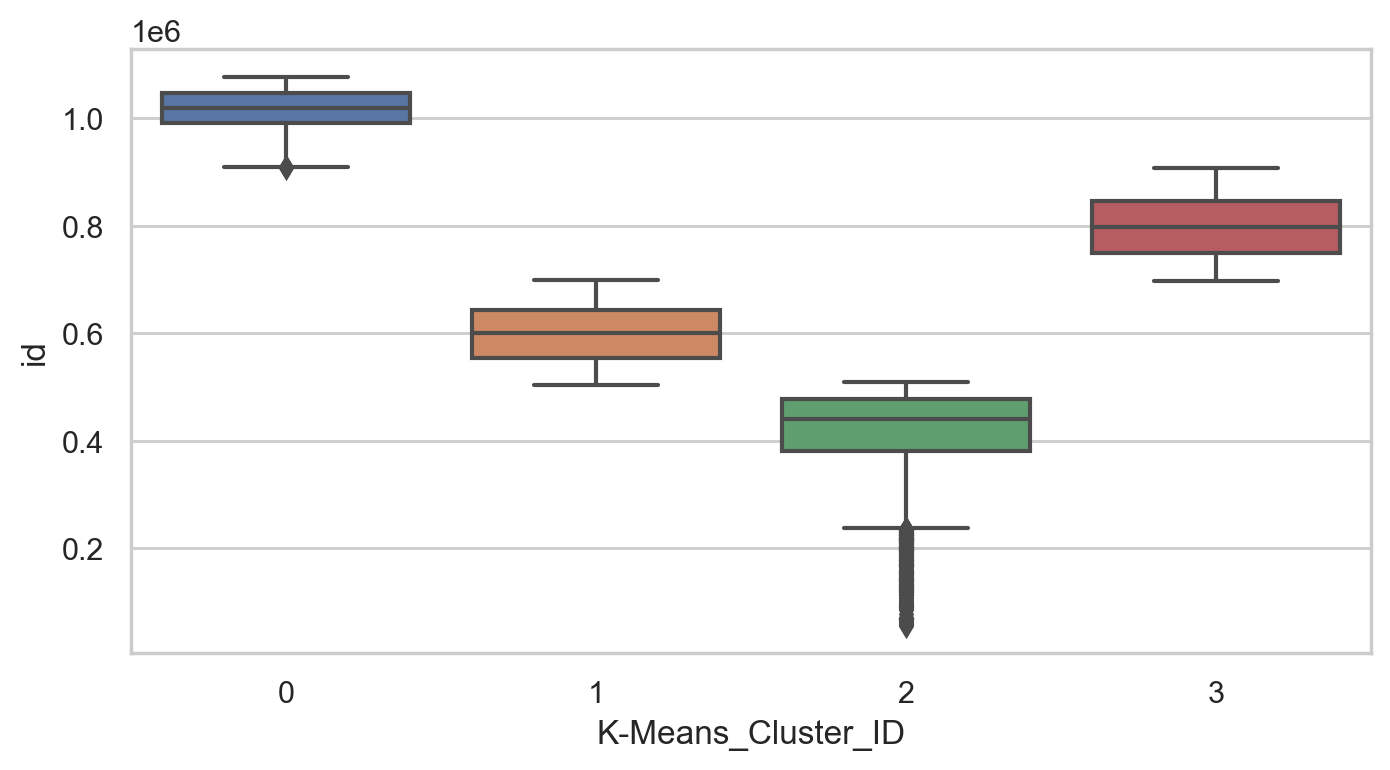

In [56]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='id', data=df1)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='loan_amnt'>

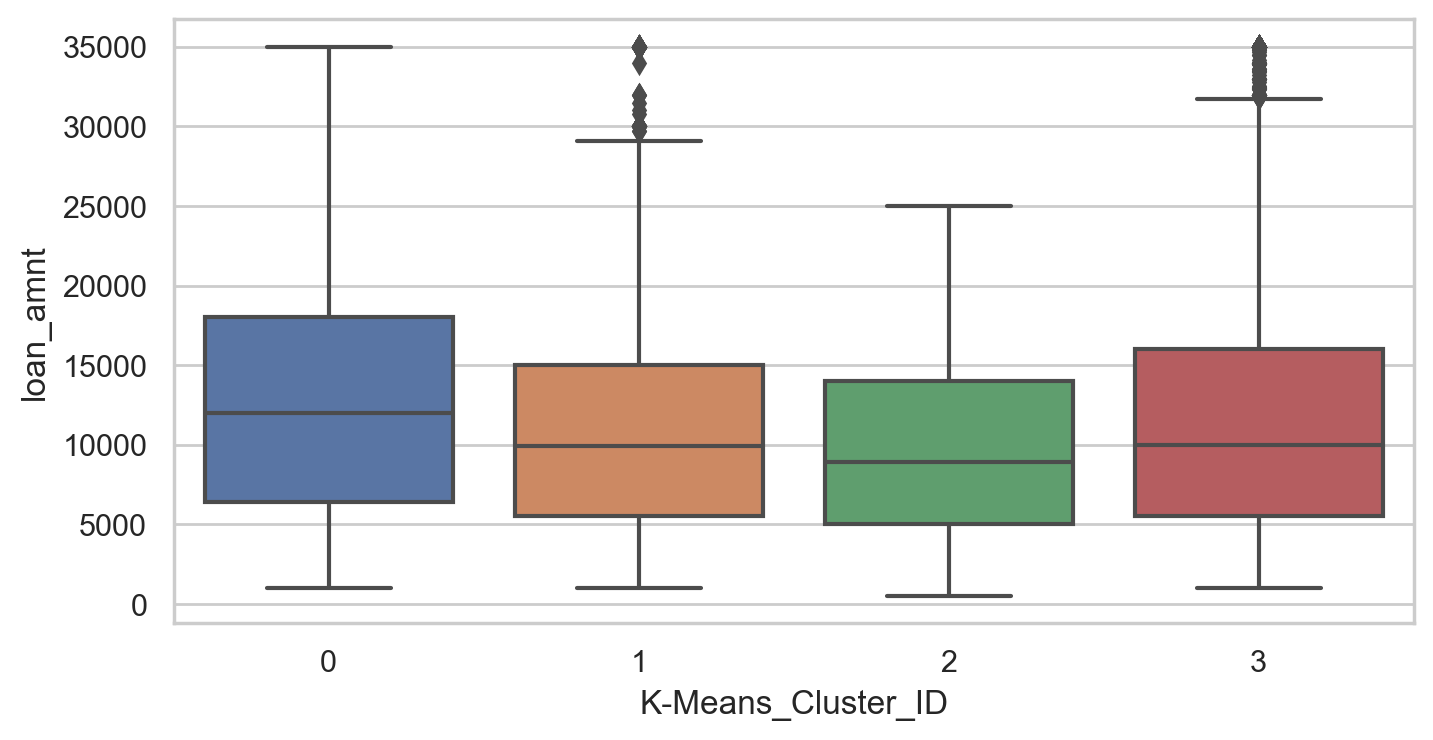

In [57]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='loan_amnt', data=df)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='fico_range_high'>

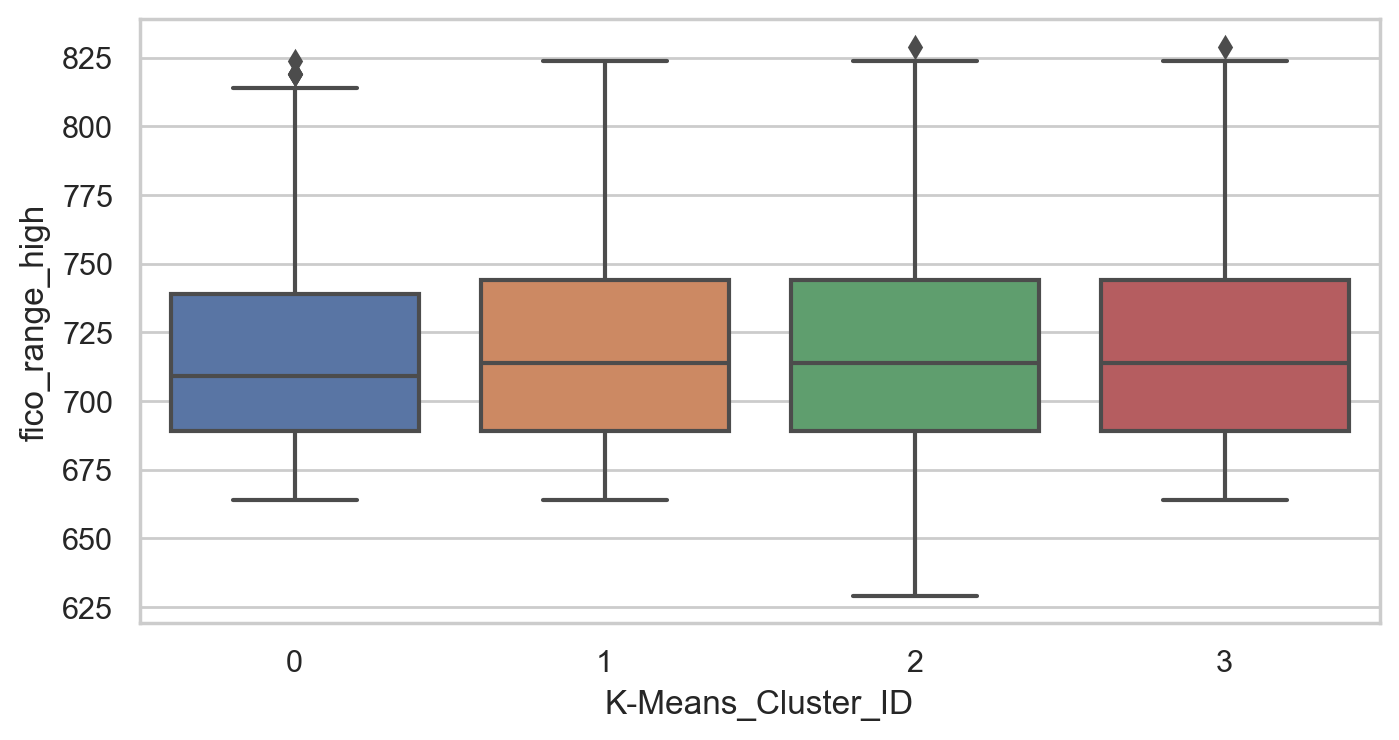

In [58]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='fico_range_high', data=df)

## Hierachical Clustering

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [45]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df)
data_scaled1 = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled1.head()

id  loan_amnt  funded_amnt  funded_amnt_inv      term      int_rate  \
0  0.999593   0.004638     0.004638         0.004615  0.000033  9.879958e-08   
1  0.999595   0.002319     0.002319         0.002319  0.000056  1.416688e-07   
2  0.999908   0.002228     0.002228         0.002228  0.000033  1.481518e-07   
3  0.998632   0.009274     0.009274         0.009274  0.000033  1.250999e-07   
4  0.996860   0.002781     0.002781         0.002781  0.000056  1.176367e-07   

   installment  home_ownership  annual_inc   loan_status  ...  \
0     0.000151        0.000004    0.022265  9.276956e-07  ...   
1     0.000056        0.000004    0.027833  0.000000e+00  ...   
2     0.000078        0.000004    0.011373  9.282693e-07  ...   
3     0.000315        0.000004    0.045626  9.273531e-07  ...   
4     0.000063        0.000004    0.074160  9.270030e-07  ...   

   home_improvement  house  major_purchase  medical  moving         other  \
0               0.0    0.0             0.0      0.0     0.0  0.000000e+00   
1               0.0    0.0             0.0      0.0     0.0  0.000000e+00   
2               0.0    0.0             0.0      0.0     0.0  0.000000e+00   
3               0.0    0.0             0.0      0.0     0.0  9.273531e-07   
4               0.0    0.0             0.0      0.0     0.0  9.270030e-07   

   renewable_energy  small_business  vacation  wedding  
0               0.0    0.000000e+00       0.0      0.0  
1               0.0    0.000000e+00       0.0      0.0  
2               0.0    9.282693e-07       0.0      0.0  
3               0.0    0.000000e+00       0.0      0.0  
4               0.0    0.000000e+00       0.0      0.0  

[5 rows x 63 columns]

In [63]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
df = pd.DataFrame(df_pca, columns=['c1', 'c2'], index=df.index)

In [64]:
df.agg(['mean', 'median', 'std', 'min', 'max']).round(2)

c1          c2
mean        -0.00        0.00
median   17929.79   -10838.24
std     211335.00    64849.01
min    -395707.16   -67803.71
max     625876.74  5912800.28

C:\Users\Iwona Gebska\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


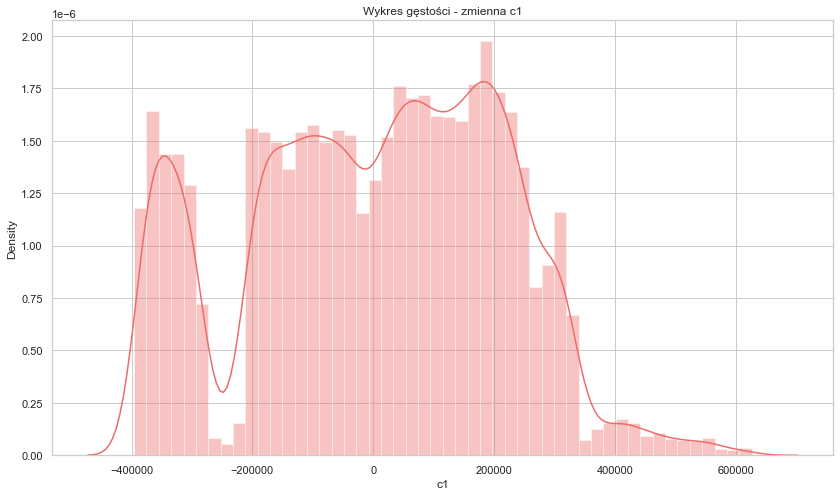

C:\Users\Iwona Gebska\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


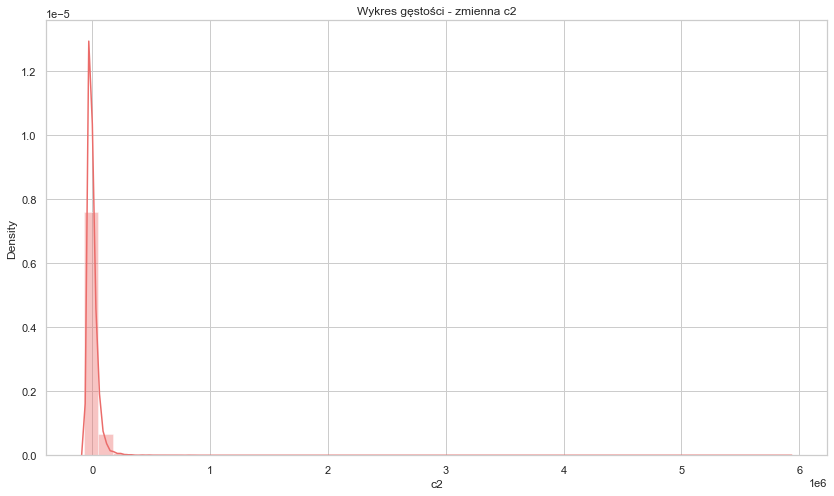

In [65]:
sns.distplot(df.c1, color = '#eb6c6a').set(title = 'Wykres gęstości - zmienna c1')
plt.show()
sns.distplot(df.c2, color = '#eb6c6a').set(title = 'Wykres gęstości - zmienna c2')
plt.show()

In [67]:
for col in df:
    if df[col].min() <= 0:
        df[col] = df[col] + np.abs(df[col].min()) + 1

In [68]:
df = np.log(df)

In [69]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

low_boundary = (q1 - 1.5 * iqr)
upp_boundary = (q3 + 1.5 * iqr)
num_of_outliers_L = (df[iqr.index] < low_boundary).sum()
num_of_outliers_U = (df[iqr.index] > upp_boundary).sum()
outliers = pd.DataFrame({'lower_boundary':low_boundary, 'upper_boundary':upp_boundary,'num_of_outliers__lower_boundary':num_of_outliers_L, 'num_of_outliers__upper_boundary':num_of_outliers_U})

In [70]:
outliers

lower_boundary  upper_boundary  num_of_outliers__lower_boundary  \
c1       11.112776       14.518813                             3666   
c2        9.439666       12.437706                              479   

    num_of_outliers__upper_boundary  
c1                                0  
c2                              315

In [71]:
for row in outliers.iterrows():
    df = df[(df[row[0]] >= row[1]['lower_boundary']) & (df[row[0]] <= row[1]['upper_boundary'])]

In [72]:
scaler = StandardScaler()
scaler.fit(df)
df_std = scaler.transform(df)
df = pd.DataFrame(data=df_std, index=df.index, columns=df.columns)

C:\Users\Iwona Gebska\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


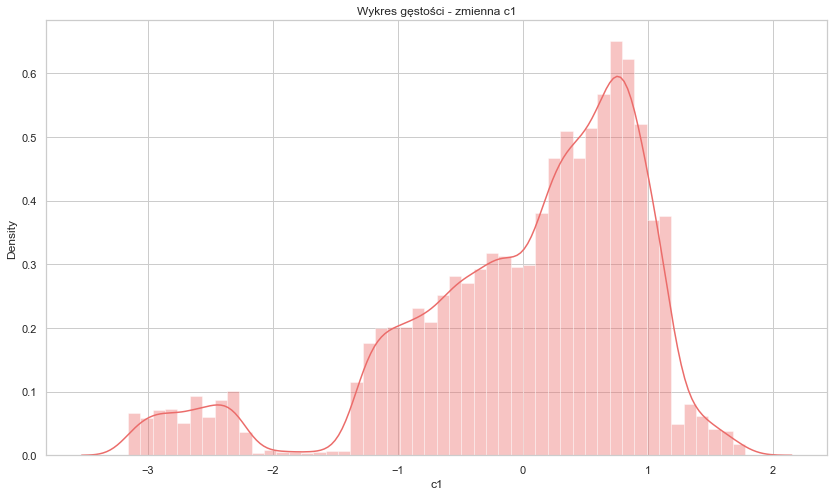

C:\Users\Iwona Gebska\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


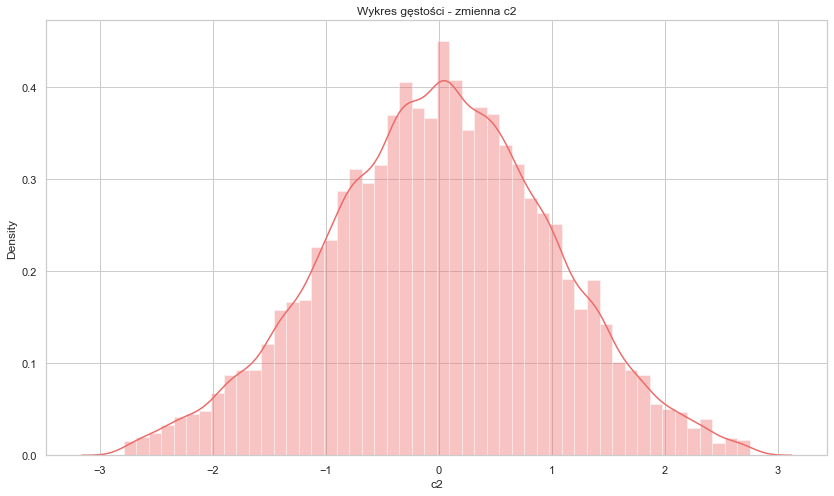

c1    c2
mean -0.00 -0.00
std   1.00  1.00
max   1.78  2.75
min  -3.16 -2.79

In [73]:
sns.distplot(df.c1, color = '#eb6c6a').set(title = 'Wykres gęstości - zmienna c1')
plt.show()
sns.distplot(df.c2, color = '#eb6c6a').set(title = 'Wykres gęstości - zmienna c2')
plt.show()
df.agg(['mean', 'std', 'max', 'min']).round(2)

C:\Users\Iwona Gebska\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


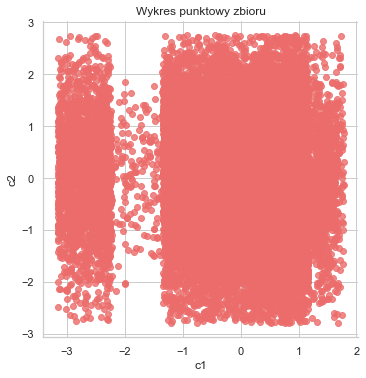

In [74]:
sns.lmplot('c1', 'c2', data = df, scatter_kws={"color": "#eb6c6a"}, fit_reg=False).set(title = 'Wykres punktowy zbioru')
plt.show()

## DBSCAN Clustering

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [66]:

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0 -0.119269  0.100448
1 -0.326255 -0.155671
2 -0.194657  0.055134
3  0.012786 -0.303179
4 -0.216187 -0.145817


In [67]:

db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal)
labels = db_default.labels_

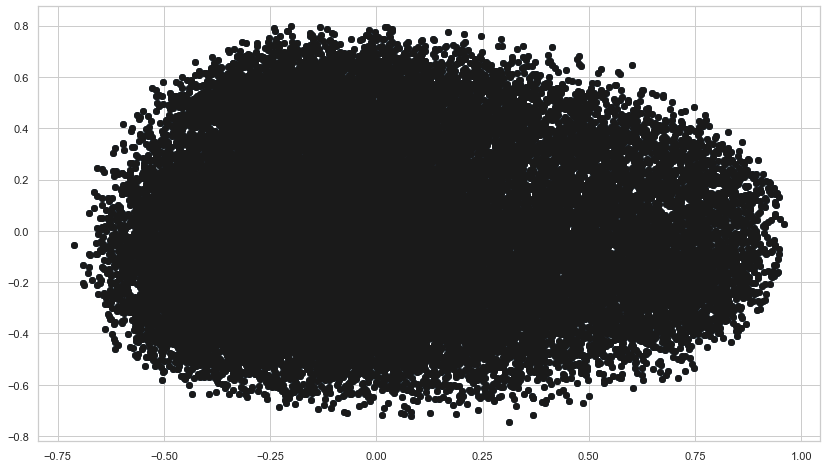

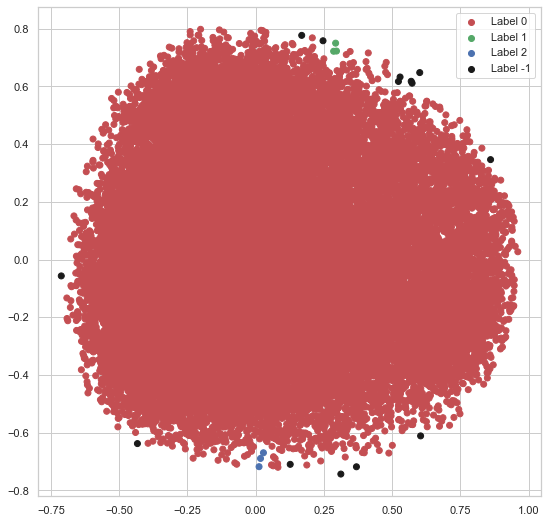

In [68]:
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
  
# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

### Podpunkt 2

In [40]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

### Drzewo decyzyjne

In [50]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import plot_roc_curve

In [43]:
dtree = DecisionTreeClassifier()

In [44]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
dt_prediction = dtree.predict(X_test)

[Text(125.47533488002013, 212.004, 'X[32] <= 1.001\ngini = 0.239\nsamples = 28981\nvalue = [4015, 24966]'),
 Text(48.03810782876892, 201.132, 'X[22] <= 684.5\ngini = 0.331\nsamples = 4361\nvalue = [3450, 911]'),
 Text(32.955639163531366, 190.26, 'X[18] <= 11191.035\ngini = 0.128\nsamples = 3362\nvalue = [3131, 231]'),
 Text(23.728060197742586, 179.388, 'X[26] <= 2014.5\ngini = 0.068\nsamples = 3151\nvalue = [3040, 111]'),
 Text(15.5843555866655, 168.516, 'X[0] <= 356456.5\ngini = 0.057\nsamples = 3119\nvalue = [3027, 92]'),
 Text(8.202292414034474, 157.644, 'X[26] <= 2010.5\ngini = 0.409\nsamples = 150\nvalue = [107, 43]'),
 Text(5.155726660250241, 146.772, 'X[0] <= 355089.0\ngini = 0.132\nsamples = 113\nvalue = [105, 8]'),
 Text(4.2183218129320155, 135.9, 'X[24] <= 1.319\ngini = 0.087\nsamples = 110\nvalue = [105, 5]'),
 Text(1.8748096946364512, 125.02799999999999, 'X[44] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.9374048473182256, 114.156, 'gini = 0.0\nsamples = 3\n

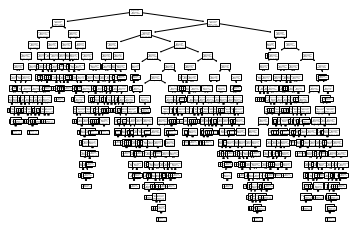

In [46]:
from sklearn import tree
tree.plot_tree(dtree)

In [47]:
roc_curve(y_test, dt_prediction)

(array([0.        , 0.06328182, 1.        ]),
 array([0.        , 0.98891833, 1.        ]),
 array([2., 1., 0.]))

In [48]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, dt_prediction))

roc_auc_score for DecisionTree:  0.9628182540302974


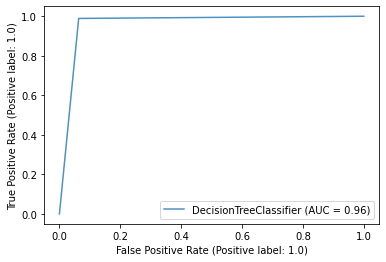

In [51]:
ax = plt.gca()
rfc_disp = plot_roc_curve(dtree, X_test, y_test, ax=ax, alpha=0.8)

### Random forest

In [74]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [53]:
rf = RandomForestClassifier(n_estimators=100, 
                            bootstrap = True,
                            max_features = 'sqrt')
rf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt')

In [258]:
rf_prediction = rf.predict(X_test)

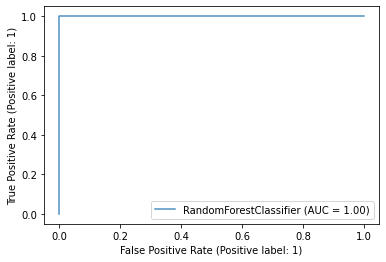

In [259]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)

In [260]:
roc_value = roc_auc_score(y_test, rf_prediction)

In [261]:
print('roc_auc_score for RandomForest: ', roc_auc_score(y_test, rf_prediction))

roc_auc_score for RandomForest:  0.9583333333333333


### KNN

In [75]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df.drop('loan_status',axis=1))
scaled_data = scale.transform(df.drop('loan_status',axis=1))
df_scaled = pd.DataFrame(scaled_data,columns=df.drop('loan_status',axis=1).columns)
df_scaled.head()

id  loan_amnt  funded_amnt  funded_amnt_inv      term  int_rate  \
0  1.875101  -0.844572    -0.837990        -0.769232 -0.607032 -0.377957   
1  1.874765  -1.179297    -1.185288        -1.115533  1.647359  0.864256   
2  1.873558  -1.192686    -1.199180        -1.129525 -0.607032  1.049782   
3  1.872082  -0.175123    -0.143394        -0.066136 -0.607032  0.385655   
4  1.864959  -1.112352    -1.115829        -1.045573  1.647359  0.170553   

   installment  home_ownership  annual_inc       dti  ...  home_improvement  \
0    -0.784960        0.962283   -0.710445  2.148224  ...         -0.283995   
1    -1.277634        0.962283   -0.617077 -1.849812  ...         -0.283995   
2    -1.160490        0.962283   -0.893259 -0.691657  ...         -0.283995   
3     0.058669        0.962283   -0.318300  1.000570  ...         -0.283995   
4    -1.239574        0.962283    0.160988  0.691529  ...         -0.283995   

      house  major_purchase   medical    moving     other  renewable_energy  \
0 -0.097921       -0.240388 -0.132732 -0.121155 -0.331740         -0.049381   
1 -0.097921       -0.240388 -0.132732 -0.121155 -0.331740         -0.049381   
2 -0.097921       -0.240388 -0.132732 -0.121155 -0.331740         -0.049381   
3 -0.097921       -0.240388 -0.132732 -0.121155  3.014409         -0.049381   
4 -0.097921       -0.240388 -0.132732 -0.121155  3.014409         -0.049381   

   small_business  vacation  wedding  
0       -0.219681  -0.09588 -0.15695  
1       -0.219681  -0.09588 -0.15695  
2        4.552054  -0.09588 -0.15695  
3       -0.219681  -0.09588 -0.15695  
4       -0.219681  -0.09588 -0.15695  

[5 rows x 62 columns]

In [76]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(scaled_data,df['loan_status'],
                                                    test_size=0.30)

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

In [210]:
knn.fit(X_scaled_train,y_scaled_train)

KNeighborsClassifier(n_neighbors=4)

In [211]:
y_pred2= knn.predict(X_scaled_test)

In [293]:
print('roc_auc_score for KNN:', roc_auc_score(y_scaled_test,y_pred2))

roc_auc_score for KNN: 0.807021627359289


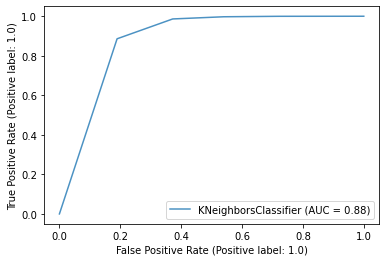

In [294]:
ax = plt.gca()
rfc_disp = plot_roc_curve(knn, X_scaled_test, y_scaled_test, ax=ax, alpha=0.8)

### Regresja logistyczna

In [295]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import os
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [296]:
clf_reg = LogisticRegression()
clf_reg=clf_reg.fit(X_train, y_train)
y_pred1 = clf_reg.predict(X_test)

In [223]:
roc_curve(y_test, y_pred1)

(array([0.        , 0.05150846, 1.        ]),
 array([0.        , 0.99951819, 1.        ]),
 array([2., 1., 0.]))

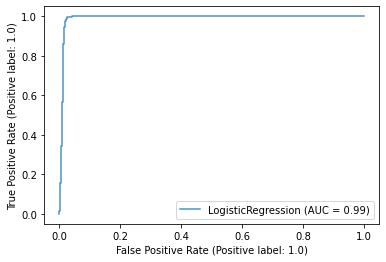

In [224]:
ax = plt.gca()
rfc_disp = plot_roc_curve(clf_reg, X_test, y_test, ax=ax, alpha=0.8)

In [225]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_pred1))

roc_auc_score for Logistic Regression:  0.9740048631419258


### MLP

In [230]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                     random_state=1)
clf_mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf_mlp.predict_proba(X_test)
clf_mlp.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1])

In [231]:
clf.fit(X_train, y_train) 

MLPClassifier(max_iter=300, random_state=1)

In [232]:
clf.score(X_test, y_test)

0.88

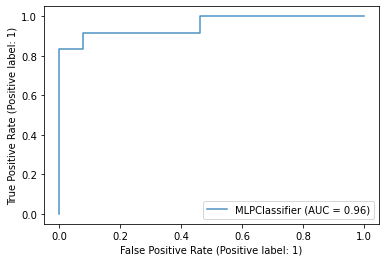

In [233]:
ax = plt.gca()
rfc_disp = plot_roc_curve(clf, X_test, y_test, ax=ax, alpha=0.8)

### Podpunkt 3 Kompresowanie danych za pomocą PCA

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
X.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'home_ownership', 'annual_inc', 'dti', 'fico_range_low',
       'fico_range_high', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'last_fico_range_high', 'last_fico_range_low', 'fico_range_high_level',
       'last_fico_range_average', 'monthly_inc', 'precent_salary_loan',
       'fico_range_average', 'last_pymnt_year', 'last_pymnt_month',
       'issue_year', 'issue_month', 'annual_inc > 15000', 'Season',
       'total_pymnt/loan_amnt', 'consolidation loan', '1 year', '10+ years',
       '2 years', '3 years', '4 years', '5 years', '6 years', '7 years',
       '8 years', '9 years', '< 1 year', 'Not Verified', 'Source Verified',
       'Verified', 'car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'sma

In [56]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [57]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_scaled)

PCA(random_state=42)

In [58]:
pca.components_[0]

array([ 0.09236907,  0.32631068,  0.33021107,  0.32968926,  0.13104622,
        0.09414554,  0.31028175, -0.08387124,  0.11759712,  0.03777348,
        0.05408716,  0.05408716,  0.08567825, -0.02304704,  0.12916184,
        0.11755678,  0.3294728 ,  0.32766271,  0.32164118,  0.06791204,
        0.06517627,  0.04701876,  0.06869939,  0.11759712,  0.15743979,
        0.05408716,  0.10969125,  0.00648617,  0.0896862 ,  0.03336144,
        0.04316757, -0.02118664,  0.07970818, -0.        , -0.0241544 ,
        0.06430251, -0.02332411, -0.01263173, -0.00574502,  0.00062315,
        0.00409468,  0.0064753 ,  0.00778572,  0.00856128, -0.04004994,
       -0.13833578, -0.02609574,  0.17098225, -0.04010221,  0.01219992,
        0.07396406, -0.02784383,  0.01078906,  0.00775065, -0.03781651,
       -0.01976319, -0.03045401, -0.05935265, -0.00516018,  0.01355611,
       -0.02682591, -0.01210065])

In [59]:
pca.explained_variance_ratio_

array([1.34766500e-01, 8.51082248e-02, 4.44647505e-02, 4.22417347e-02,
       4.05930646e-02, 3.08523231e-02, 2.57569996e-02, 2.35442929e-02,
       2.22126164e-02, 2.11317385e-02, 1.96636316e-02, 1.94075711e-02,
       1.86557786e-02, 1.84605532e-02, 1.82430294e-02, 1.81911440e-02,
       1.79692351e-02, 1.78272342e-02, 1.76900831e-02, 1.74683325e-02,
       1.73195319e-02, 1.72170072e-02, 1.71589459e-02, 1.70445335e-02,
       1.69171940e-02, 1.67545938e-02, 1.66590048e-02, 1.65736683e-02,
       1.65007212e-02, 1.63791623e-02, 1.61631159e-02, 1.59149083e-02,
       1.56977222e-02, 1.52356486e-02, 1.48545159e-02, 1.47190879e-02,
       1.39786766e-02, 1.20704570e-02, 1.17322342e-02, 9.87907889e-03,
       9.39883313e-03, 5.76399603e-03, 4.63390201e-03, 4.36804140e-03,
       3.63950827e-03, 2.59180868e-03, 2.26806219e-03, 1.51213855e-03,
       1.31486737e-03, 6.76989118e-04, 3.93557462e-04, 2.43674110e-04,
       1.41417042e-04, 3.45582291e-05, 1.30109795e-31, 3.17005459e-32,
      

In [60]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.1347665 , 0.21987472, 0.26433948, 0.30658121, 0.34717427,
       0.3780266 , 0.4037836 , 0.42732789, 0.44954051, 0.47067225,
       0.49033588, 0.50974345, 0.52839923, 0.54685978, 0.56510281,
       0.58329395, 0.60126319, 0.61909042, 0.63678051, 0.65424884,
       0.67156837, 0.68878538, 0.70594432, 0.72298886, 0.73990605,
       0.75666064, 0.77331965, 0.78989332, 0.80639404, 0.8227732 ,
       0.83893632, 0.85485123, 0.87054895, 0.8857846 , 0.90063911,
       0.9153582 , 0.92933688, 0.94140733, 0.95313957, 0.96301865,
       0.97241748, 0.97818148, 0.98281538, 0.98718342, 0.99082293,
       0.99341474, 0.9956828 , 0.99719494, 0.9985098 , 0.99918679,
       0.99958035, 0.99982402, 0.99996544, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

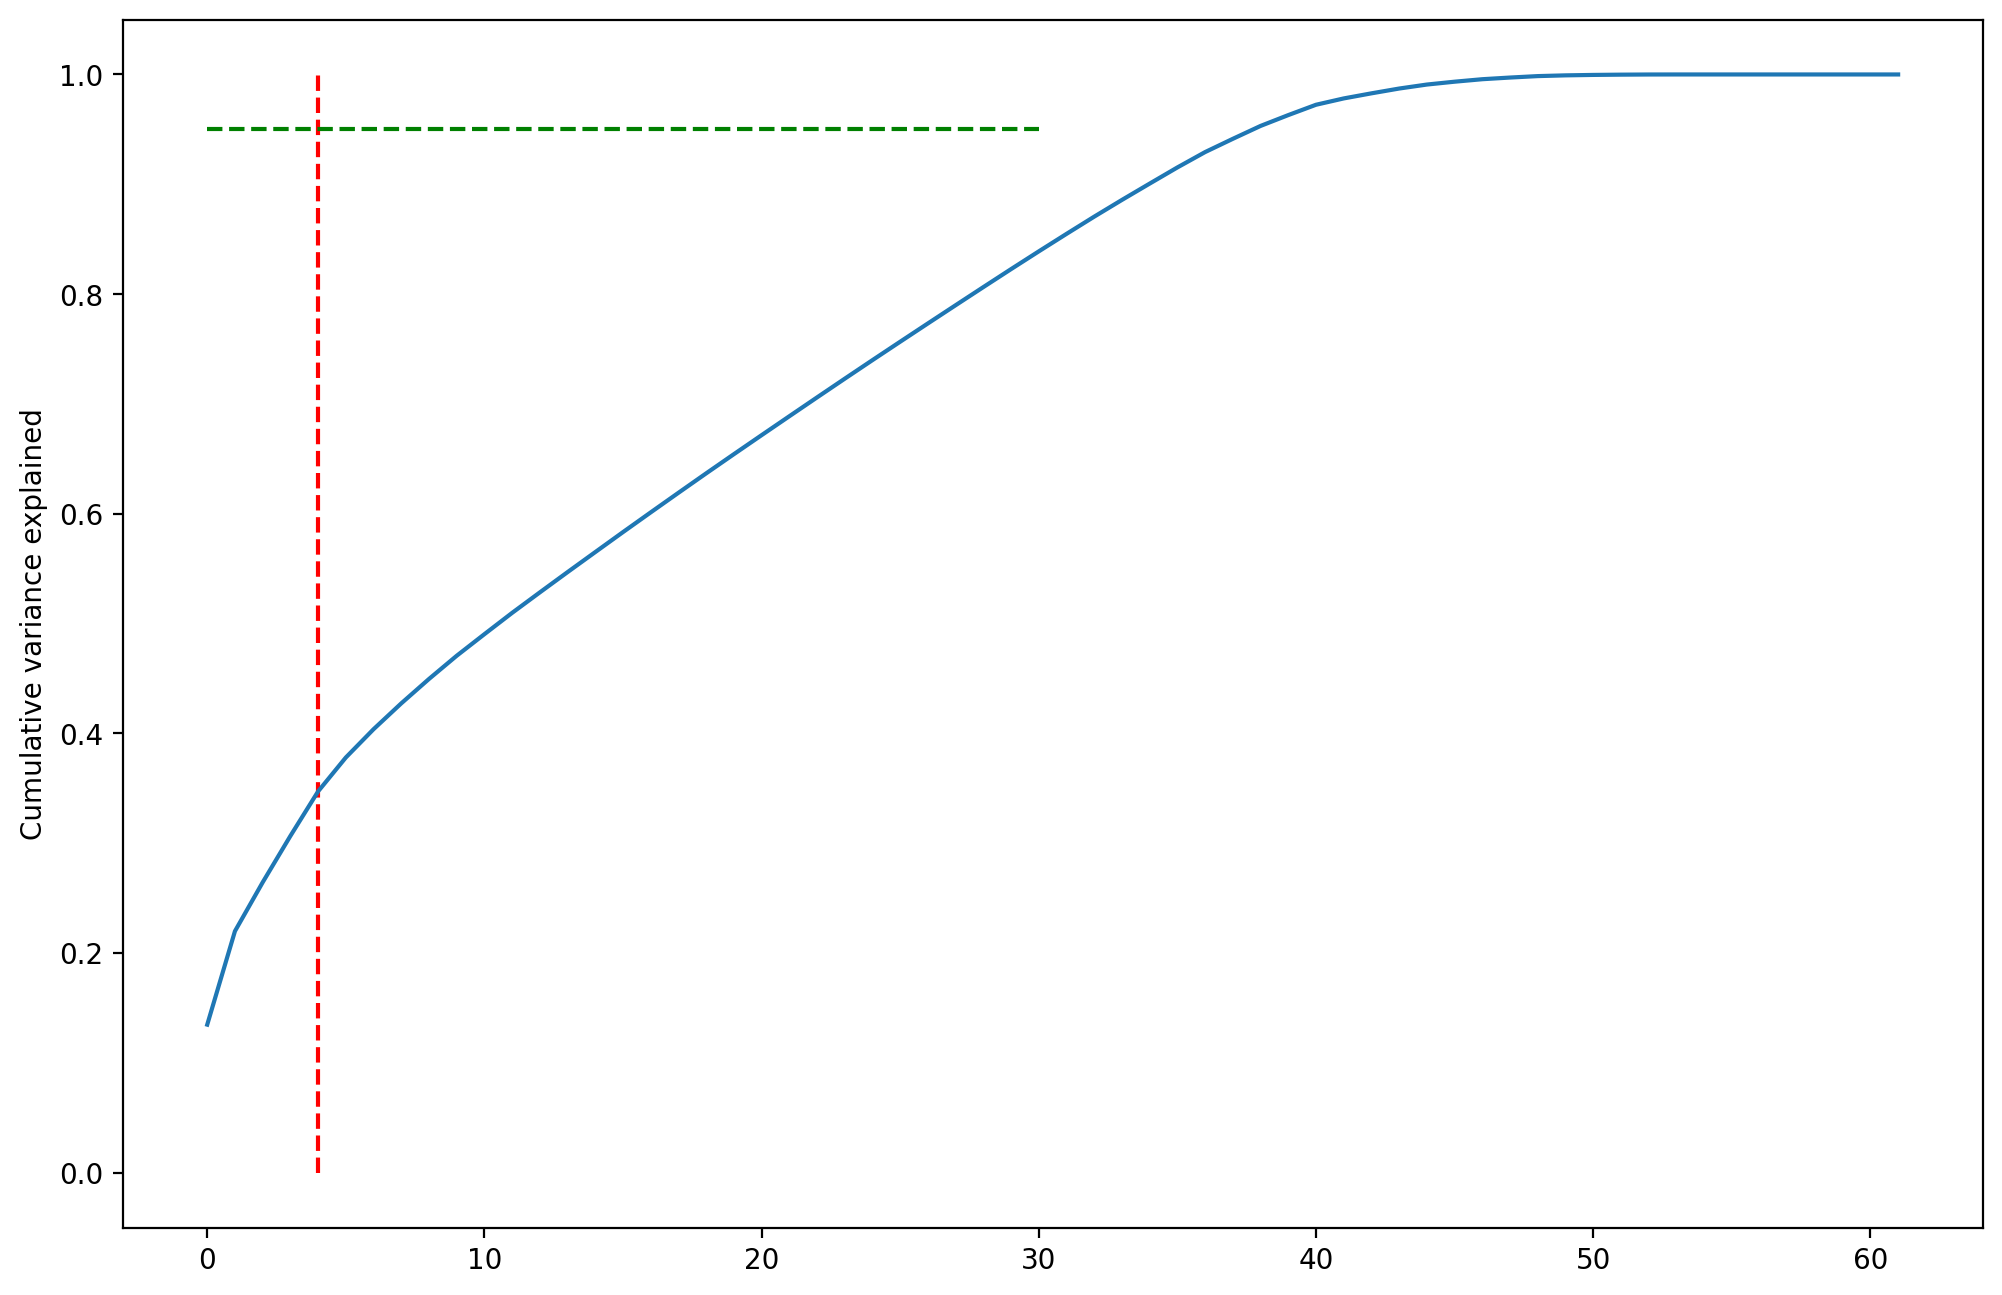

In [61]:
fig = plt.figure(figsize=[12,8],dpi=200)
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [62]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)
X_pca_final = pca_final.fit_transform(X_scaled)

In [63]:
print(X.shape)
print(X_pca_final.shape)

(38642, 62)
(38642, 20)


In [64]:
colnames = list(X.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pca_df.head()

PC1       PC2          Feature
0  0.092369  0.057798               id
1  0.326311  0.028544        loan_amnt
2  0.330211  0.031898      funded_amnt
3  0.329689  0.033146  funded_amnt_inv
4  0.131046  0.088059             term

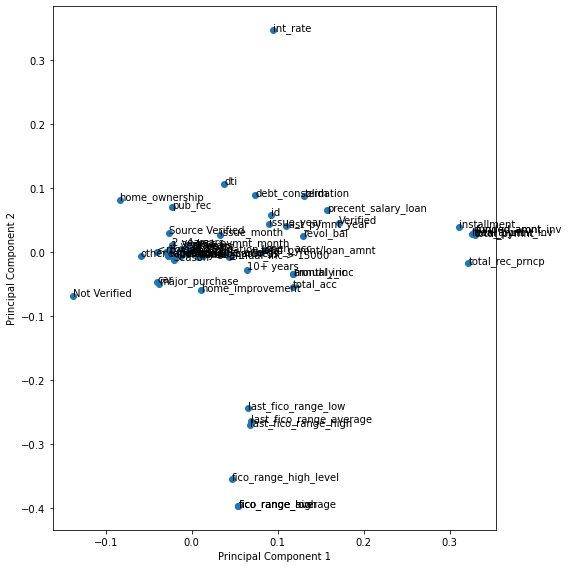

In [65]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

### MLP

In [66]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X_pca_final, y = make_classification(n_samples=100, random_state=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca_final, y, stratify=y, random_state=1)

In [67]:
clf_mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train1, y_train1)
clf_mlp.predict_proba(X_test1)
clf_mlp.predict(X_test1)

clf_mlp.score(X_test1, y_test1)

0.88

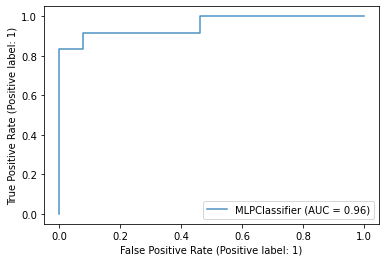

In [68]:
ax = plt.gca()
rfc_disp = plot_roc_curve(clf_mlp, X_test1, y_test1, ax=ax, alpha=0.8)

### Regresja Logistyczna

In [69]:
clf_reg = LogisticRegression()
clf_reg = clf_reg.fit(X_train1, y_train1)
y_pred11 = clf_reg.predict(X_test1)

In [70]:
roc_curve(y_test1, y_pred11)

(array([0., 0., 1.]),
 array([0.        , 0.83333333, 1.        ]),
 array([2, 1, 0]))

In [71]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test1, y_pred11))

roc_auc_score for Logistic Regression:  0.9166666666666667


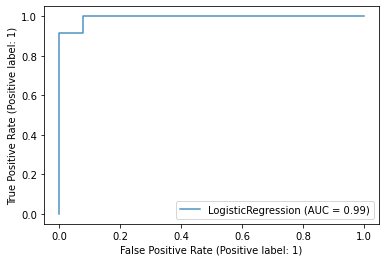

In [72]:
ax = plt.gca()
rfc_disp = plot_roc_curve(clf_reg, X_test1, y_test1, ax=ax, alpha=0.8)

### KNN

In [78]:
knn.fit(X_pca_final,y)

KNeighborsClassifier(n_neighbors=4)

In [79]:
y_pred22= knn.predict(X_pca_final)

In [80]:
roc_auc_score(y,y_pred22)

0.9391756702681072

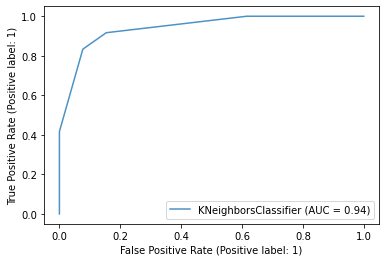

In [81]:
ax = plt.gca()
rfc_disp = plot_roc_curve(knn, X_test1, y_test1, ax=ax, alpha=0.8)

### Drzewo decyzyjne

In [82]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca_final, y, test_size=0.30,random_state=42)

In [83]:
dtree.fit(X_train2,y_train2)

DecisionTreeClassifier()

In [84]:
dt_prediction = dtree.predict(X_test2)

In [85]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred222 = clf.predict(X_test2)

In [86]:
roc_curve(y_test2, y_pred222)

(array([0.        , 0.13333333, 1.        ]),
 array([0.        , 0.86666667, 1.        ]),
 array([2, 1, 0]))

In [87]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test2, y_pred222))

roc_auc_score for DecisionTree:  0.8666666666666667


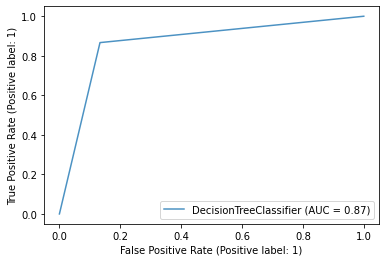

In [88]:
ax = plt.gca()
rfc_disp = plot_roc_curve(clf, X_test2, y_test2, ax=ax, alpha=0.8)

## Random Forest

In [98]:
rf = RandomForestClassifier(n_estimators=100, 
                            bootstrap = True,
                            max_features = 'sqrt')
rf.fit(X_train2, y_train2)

RandomForestClassifier(max_features='sqrt')

In [99]:
rf_prediction_pca = rf.predict(X_test2)

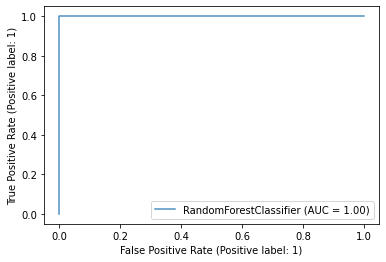

In [105]:
ax = plt.gca()
rfc_disp_pca = plot_roc_curve(rf, X_test2, y_test2, ax=ax, alpha=0.8)

In [106]:
roc_value_pca = roc_auc_score(y_test2, rf_prediction_pca)

In [107]:
print('roc_auc_score for RandomForest: ', roc_auc_score(y_test2, rf_prediction_pca))

roc_auc_score for RandomForest:  0.9333333333333333


### Podpunkt 4 - Zbuduj finalny model, którego AUROC score będzie >= 80%, pamiętaj o doborze istotnych zmiennych, kroswalidacji oraz dostrojeniu parametrów modelu, pomyśl również o zbalansowaniu klas.